In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

Loading in Dataset


In [32]:
League = pd.read_csv('2023_LoL_esports_match_data_from_OraclesElixir.csv')
print(type(League))
#for i in League:
 #   print(i)
    
League=League.drop(['url','year','split','playoffs','date','patch','playername','playerid','teamname','teamid','firsttower','towers','opp_towers','firstmidtower','firsttothreetowers','turretplates','opp_turretplates'],axis=1)
League.to_csv("pre.csv",index=False)
#for i in League:
#    print(i)

<class 'pandas.core.frame.DataFrame'>


Dropping any 'partial' data points


In [3]:

print(pd.unique(League.datacompleteness))
League = League[League['datacompleteness'] == 'complete']
print(pd.unique(League.datacompleteness))


['complete' 'partial']
['complete']


Leagues present in dataset

In [4]:
pd.unique(League.league)

array(['LFL2', 'DDH', 'EL', 'GL', 'LCKC', 'NEXO', 'UL', 'LVP SL', 'LCK',
       'LFL', 'PRM', 'LMF', 'SL (LATAM)', 'VL', 'CBLOL', 'LEC', 'NACL',
       'LCO', 'CBLOLA', 'LHE', 'NLC', 'GLL', 'ESLOL', 'LLA', 'EBL', 'TCL',
       'PGN', 'LPLOL', 'LCS', 'HM', 'LJL', 'HC', 'AL', 'PCS', 'VCS', 'EM',
       'MSI', 'LAS', 'LRN', 'LRS', 'EPL', 'LJLA', 'CT', 'WLDs'],
      dtype=object)

## LCK 데이터만 가지는 데이터프레임 생성

In [5]:
LCK = League[League['league'] == 'LCK']

## 스프링, 썸머시즌 각각을 가지는 데이터프레임 생성

In [6]:
LCKSpring = LCK[LCK['split']=='Spring']

LCKSummer = LCK[LCK['split']=='Summer']

In [7]:
LCKSpring

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
1164,ESPORTSTMNT04_2659018,complete,NaN,LCK,2023,Spring,0,2023-01-18 08:17:31,1,13.01,...,111.0,724.0,771.0,-4.0,2.0,0.0,0.0,0.0,0.0,2.0
1165,ESPORTSTMNT04_2659018,complete,NaN,LCK,2023,Spring,0,2023-01-18 08:17:31,1,13.01,...,99.0,338.0,-3.0,-6.0,2.0,1.0,0.0,1.0,0.0,0.0
1166,ESPORTSTMNT04_2659018,complete,NaN,LCK,2023,Spring,0,2023-01-18 08:17:31,1,13.01,...,132.0,410.0,-32.0,10.0,0.0,1.0,1.0,0.0,1.0,0.0
1167,ESPORTSTMNT04_2659018,complete,NaN,LCK,2023,Spring,0,2023-01-18 08:17:31,1,13.01,...,119.0,1174.0,1234.0,13.0,1.0,2.0,0.0,0.0,0.0,2.0
1168,ESPORTSTMNT04_2659018,complete,NaN,LCK,2023,Spring,0,2023-01-18 08:17:31,1,13.01,...,5.0,530.0,-47.0,-3.0,0.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55927,ESPORTSTMNT01_3344160,complete,NaN,LCK,2023,Spring,1,2023-04-09 09:26:59,4,13.05,...,141.0,935.0,774.0,15.0,1.0,2.0,0.0,0.0,0.0,2.0
55928,ESPORTSTMNT01_3344160,complete,NaN,LCK,2023,Spring,1,2023-04-09 09:26:59,4,13.05,...,155.0,-292.0,-82.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0
55929,ESPORTSTMNT01_3344160,complete,NaN,LCK,2023,Spring,1,2023-04-09 09:26:59,4,13.05,...,8.0,105.0,-112.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0
55930,ESPORTSTMNT01_3344160,complete,NaN,LCK,2023,Spring,1,2023-04-09 09:26:59,4,13.05,...,586.0,-2204.0,-2333.0,-41.0,0.0,0.0,4.0,4.0,7.0,0.0


## LCK에서 나온 챔피언 종류 (unique)

In [8]:
np.sort(pd.unique(LCK['champion'].astype(str)))

array(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Annie', 'Aphelios',
       'Ashe', 'Aurelion Sol', 'Azir', 'Blitzcrank', 'Braum', 'Caitlyn',
       'Camille', 'Cassiopeia', "Cho'Gath", 'Corki', 'Darius', 'Diana',
       'Draven', 'Elise', 'Ezreal', 'Fiora', 'Galio', 'Gangplank', 'Gnar',
       'Gragas', 'Graves', 'Gwen', 'Heimerdinger', 'Illaoi', 'Irelia',
       'Ivern', 'Jarvan IV', 'Jax', 'Jayce', 'Jhin', 'Jinx', "K'Sante",
       "Kai'Sa", 'Kalista', 'Karma', 'Kassadin', 'Kayle', 'Kennen',
       "Kha'Zix", 'Kindred', "Kog'Maw", 'LeBlanc', 'Lee Sin', 'Leona',
       'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite',
       'Maokai', 'Milio', 'Miss Fortune', 'Morgana', 'Nami', 'Nautilus',
       'Neeko', 'Nidalee', 'Nilah', 'Nocturne', 'Olaf', 'Orianna', 'Ornn',
       'Pantheon', 'Poppy', 'Pyke', 'Quinn', 'Rakan', "Rek'Sai", 'Rell',
       'Renata Glasc', 'Renekton', 'Rumble', 'Ryze', 'Samira', 'Sejuani',
       'Senna', 'Seraphine', 'Sett', 'Singed', 'Sion', 'Sivir

## 니코 평균승률 (본인 주챔은 프로에서 승률이 얼마인지 확인해보기)

In [9]:
LCK[LCK['champion']=='Neeko'].groupby('champion').agg({'result':'mean'}).sort_values('result')

,result
champion,
Neeko,0.633333


### Making a dataframe of champion picks during Spring Split

In [10]:
test = LCK[LCK['split']=='Spring'].champion.value_counts()
test = test.to_frame()
test = test.rename(columns={"champion": "SpringPicks"})


Making a dataframe of champion picks during Summer Split


In [11]:
test2 = LCK[LCK['split']=='Summer'].champion.value_counts()
test2 = test2.to_frame()
test2 = test2.rename(columns={"champion": "SummerPicks"})


 Joining the two data frames


In [12]:
SplitPicks = test.join(test2,how='outer')


ValueError: columns overlap but no suffix specified: Index(['count'], dtype='object')

 Fill NAN as 0 picks


In [ ]:
SplitPicks = SplitPicks.fillna(0)



Quick formula to calculate percent change

In [ ]:

def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

SplitPicks['Pick Difference'] = percentage_change(SplitPicks['SpringPicks'],SplitPicks['SummerPicks'])


Reseting Index to make 'champion' a column


In [42]:

SplitPicks = SplitPicks.reset_index().rename(columns={"index":"Champion"})
SplitPicks

,Champion,SpringPicks,SummerPicks,Pick Difference
0,Aatrox,2.0,23.0,1050.000000
1,Ahri,28.0,44.0,57.142857
2,Akali,44.0,10.0,-77.272727
3,Alistar,1.0,54.0,5300.000000
4,Amumu,0.0,1.0,inf
...,...,...,...,...
117,Zac,1.0,1.0,0.000000
118,Zeri,122.0,60.0,-50.819672
119,Ziggs,4.0,2.0,-50.000000
120,Zilean,2.0,0.0,-100.000000


Create a list of Win Rates in specific Splits then Join that thoses lists into the SplitPicks DataFrame

In [23]:

springWin = LCKSpring.groupby('champion')['result'].mean()
summerWin = LCKSummer.groupby('champion')['result'].mean()

springWin = springWin.to_frame()
summerWin = summerWin.to_frame()

springWin = springWin.reset_index()
summerWin = summerWin.reset_index()
springWin = springWin.rename(columns={"champion": "Champion",'result':'SpringResult'})
summerWin = summerWin.rename(columns={"champion": "Champion",'result':'SummerResult'})

SplitPicks = SplitPicks.merge(springWin,on='Champion')
SplitPicks = SplitPicks.merge(summerWin,on='Champion')
SplitPicks['Win Difference'] = percentage_change(SplitPicks['SpringResult'],SplitPicks['SummerResult'])





Rearranging Columns

In [ ]:
SplitPicks = SplitPicks[["Champion","SpringPicks","SpringResult","SummerPicks","SummerResult","Win Difference","Pick Difference"]]

<Axes: xlabel='SpringPicks', ylabel='SummerPicks'>

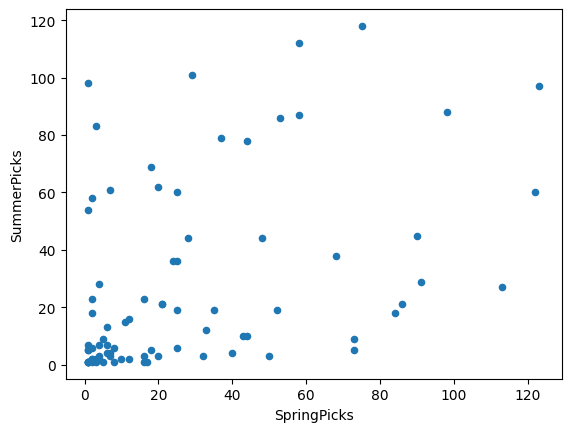

In [24]:
SplitPicks.plot(x='SpringPicks',y='SummerPicks',kind='scatter')

 Plotting Scatterplot

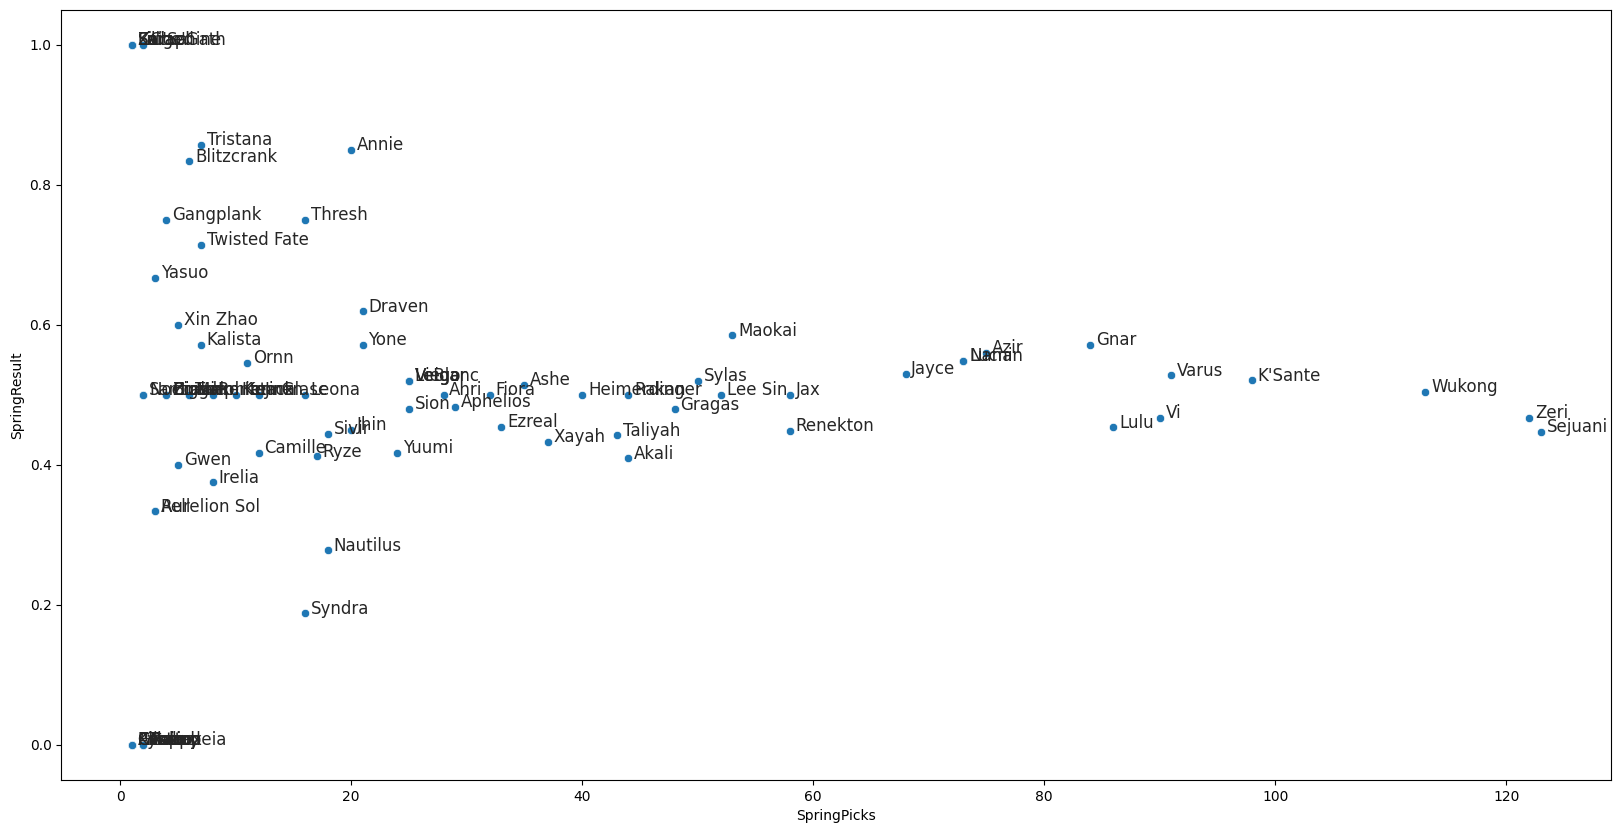

In [25]:

fig, ax = plt.subplots(figsize=(20,10))
sb.set(style="ticks")
sb.set_style("white")
sb.scatterplot(ax=ax, data=SplitPicks, x='SpringPicks',y='SpringResult')

add labels here

In [ ]:
for v in SplitPicks.iterrows():
    plt.text(v[1][1]+0.5, v[1][2], f'{v[1][0]}')

In [26]:
%cd /content/drive/MyDrive/test

/content/drive/MyDrive/test


In [27]:
SplitPicks.to_csv('SplitPicks.csv')

In [28]:
len(pd.unique(League['gameid']))

8306

In [29]:
League[(League['infernals'] > 1) | (League['mountains'] > 1)| (League['clouds'] > 1 )|(League['oceans'] > 1)].groupby('league')['infernals','mountains','clouds','oceans'].sum()

<ipython-input-29-26b3a5554d74>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  League[(League['infernals'] > 1) | (League['mountains'] > 1)| (League['clouds'] > 1 )|(League['oceans'] > 1)].groupby('league')['infernals','mountains','clouds','oceans'].sum()


,infernals,mountains,clouds,oceans
league,,,,
AL,75.0,55.0,82.0,39.0
CBLOL,145.0,128.0,127.0,119.0
CBLOLA,96.0,100.0,85.0,118.0
CT,16.0,13.0,16.0,24.0
DDH,41.0,32.0,30.0,29.0
EBL,59.0,70.0,51.0,75.0
EL,16.0,11.0,17.0,10.0
EM,87.0,97.0,120.0,96.0
EPL,25.0,15.0,25.0,13.0


In [30]:
drakes = League[(League['position']=='team')].groupby(['league','gameid'])['infernals','mountains','clouds','oceans'].sum()
drakesouls = drakes[drakes>1]
drakesouls = drakesouls.notnull().astype('int')
leaguesouls = drakesouls.groupby('league').sum()
leaguesouls = leaguesouls.reset_index()

<ipython-input-30-b05e7412baa3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drakes = League[(League['position']=='team')].groupby(['league','gameid'])['infernals','mountains','clouds','oceans'].sum()


In [31]:
leaguesouls

,league,infernals,mountains,clouds,oceans
0,AL,23,15,31,16
1,CBLOL,48,41,39,37
2,CBLOLA,32,37,27,40
3,CT,6,8,3,8
4,DDH,13,13,10,7
5,EBL,19,26,18,25
6,EL,6,4,6,2
7,EM,32,32,45,33
8,EPL,12,12,9,6
9,ESLOL,18,23,20,15


<Axes: >

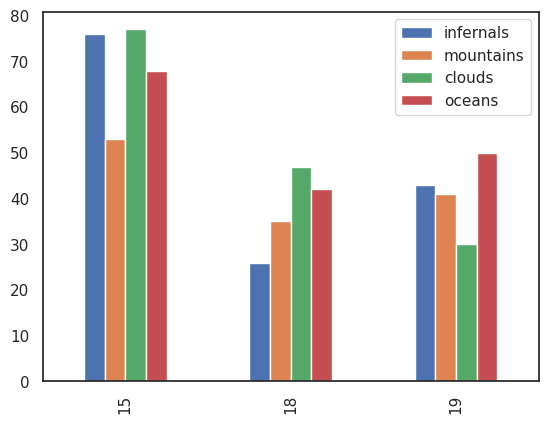

In [32]:
leaguesouls[(leaguesouls['league']=='LCK')|(leaguesouls['league']=='LPL')|(leaguesouls['league']=='LCS')|(leaguesouls['league']=='LEC')].plot(kind='bar')